In [1]:
import openslide as ops
import os
import matplotlib.pyplot as plt
import logging

In [2]:
THUMB_SIZE = 1024
DATASET_DIR = "../../../Lfstorage/wsis_2"
THUMB_DIR = "./thumbnails"
LOG_DIR = "./logs"
LOG_NAME = "ds_analysis.log"

In [3]:
if not os.path.exists(THUMB_DIR):
    os.makedirs(THUMB_DIR)
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)

logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', 
                    filename=LOG_DIR + "/" + LOG_NAME)

logging.info("Starting thumbnail generation...")
logging.info(f"Dataset directory: {DATASET_DIR}")
logging.info(f"Thumbnail directory: {THUMB_DIR}")



wsi_files = []
for root, dirs, files in os.walk(DATASET_DIR):
    for file in files:
        if file.endswith((".svs", ".tiff", ".tif")):
            wsi_files.append(os.path.join(root, file))

print(f"Found {len(wsi_files)} wsi files")
logging.info(f"Found {len(wsi_files)} wsi files")

Found 30 wsi files


In [4]:
def plot_thumbnail(thumbnail, title):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(thumbnail)
    ax.set_title(title)
    plt.show()

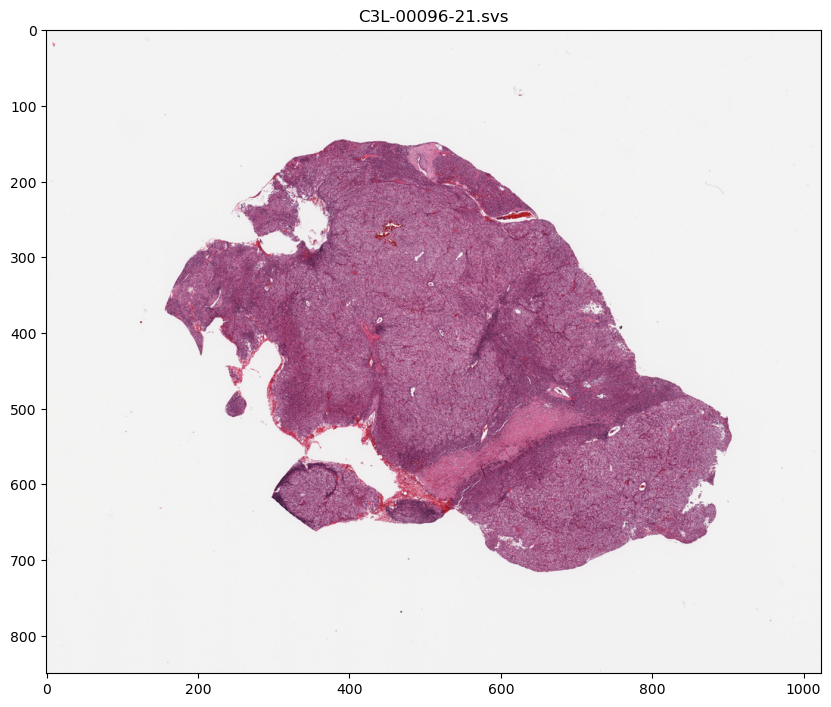

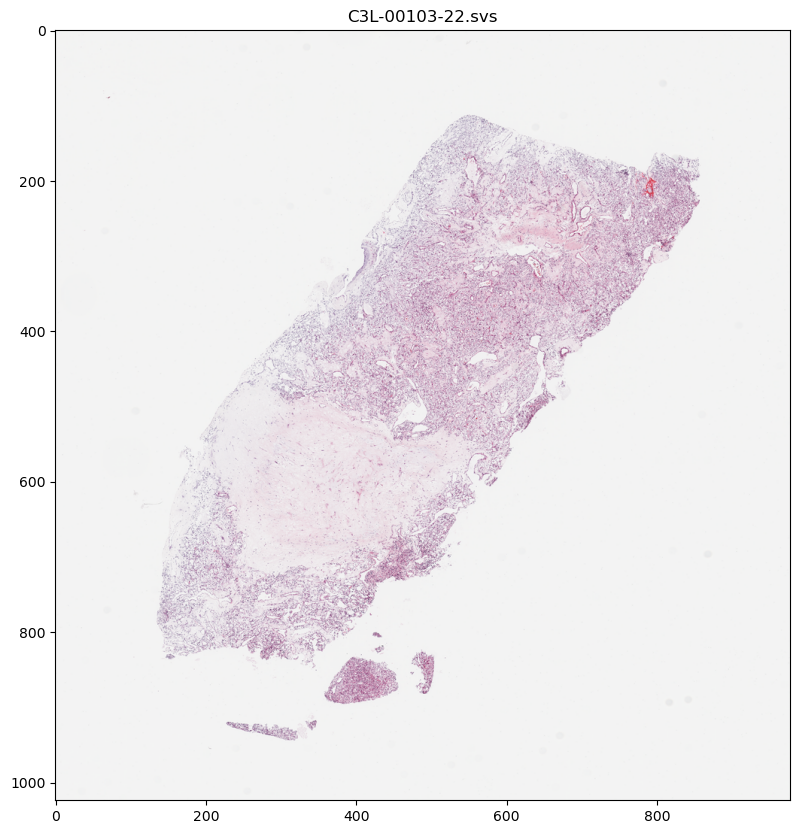

In [ ]:
for idx,tiff_file in enumerate(wsi_files):
    slide_path = tiff_file
    try:
        slide = ops.OpenSlide(slide_path)
        thumbnail = slide.get_thumbnail((THUMB_SIZE, THUMB_SIZE))
        thumbnail.save(os.path.join(THUMB_DIR, os.path.basename(slide_path).split(".")[0] + ".png"))
        plot_thumbnail(thumbnail, os.path.basename(slide_path))
        scale = THUMB_SIZE / max(slide.dimensions)
        logging.info(f"Slide: {slide_path}")
        logging.info(f"Slide Dimension: {slide.dimensions} pixels")
        logging.info(f"Number of Levels: {slide.level_count}")
        logging.info(f"file size: {round(os.path.getsize(slide_path) / 1024 ** 2, 2)} MB")
        logging.info(f"Scale: {scale}")
        logging.info(f"Thumbnail Dimension: {[int(dim * scale) for dim in slide.dimensions]} pixels")
        logging.info("-----------------------------")

    except Exception as e:
        logging.error(f"Error processing {slide_path}, {e}")
        continue